In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score
import re 
import string

In [4]:
import pickle

In [5]:
data_fake = pd.read_csv('Fake.csv') 
data_true = pd.read_csv('True.csv') 

In [6]:
data_true.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [7]:
data_fake['class'] = 0
data_true['class'] = 1

In [8]:
data_fake.shape,data_true.shape

((23481, 5), (21417, 5))

In [9]:
data_fake_manual_testing = data_fake.tail(10)
for i in range(23480,23470,-1):
    data_fake.drop([i], axis = 0 , inplace = True)

data_true_manual_testing = data_true.tail(10)
for i in range(21416,21406,-1):
    data_true.drop([i], axis = 0 , inplace = True)

In [10]:
data_fake_manual_testing.head()


,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0


In [11]:
data_merge = pd.concat([data_fake , data_true], axis = 0)

In [12]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [13]:
data = data_merge.drop(['title','subject','date'], axis=1)

In [14]:
data.head(10)

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
5,The number of cases of cops brutalizing and ki...,0
6,Donald Trump spent a good portion of his day a...,0
7,In the wake of yet another court decision that...,0
8,Many people have raised the alarm regarding th...,0
9,Just when you might have thought we d get a br...,0


In [15]:
data.isnull().sum()

text     0
class    0
dtype: int64

In [16]:
data = data.sample(frac =1)

In [17]:
data.head()

,text,class
810,The Senate Judiciary Committee just gave forme...,0
19645,PARIS (Reuters) - The French Socialist Party p...,1
2389,"(Reuters) - Four years ago, Frances Broaddus-C...",1
6421,"(Reuters) - President-elect Donald Trump, in a...",1
10026,Here is an excerpt from their coverage of Todd...,0


In [18]:
data.reset_index(inplace = True)

In [19]:
data.head()

,index,text,class
0,810,The Senate Judiciary Committee just gave forme...,0
1,19645,PARIS (Reuters) - The French Socialist Party p...,1
2,2389,"(Reuters) - Four years ago, Frances Broaddus-C...",1
3,6421,"(Reuters) - President-elect Donald Trump, in a...",1
4,10026,Here is an excerpt from their coverage of Todd...,0


In [20]:
data.drop(['index'],axis = 1,inplace = True)

In [21]:
data.head()

,text,class
0,The Senate Judiciary Committee just gave forme...,0
1,PARIS (Reuters) - The French Socialist Party p...,1
2,"(Reuters) - Four years ago, Frances Broaddus-C...",1
3,"(Reuters) - President-elect Donald Trump, in a...",1
4,Here is an excerpt from their coverage of Todd...,0


In [22]:
def wordopt(text):
    text = text.lower()  # Convert text to lowercase
    
    text = re.sub(r".*?", "", text)  # Remove text inside square brackets
    text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation but keep spaces
    text = re.sub(r'https?://\S+|www\.\S+', "", text)  # Remove URLs
    text = re.sub(r'<.*?>+', "", text)  # Remove HTML tags
    text = re.sub(r"[%s]" % re.escape(string.punctuation), "", text)  # Remove punctuation
    text = re.sub(r'\n', "", text)  # Remove newlines
    text = re.sub(r'\w*\d\w*', "", text)  # Remove words containing numbers
    
    return text

In [23]:
data['text'] = data['text'].apply(wordopt)

In [24]:
data.head(10)

,text,class
0,the senate judiciary committee just gave forme...,0
1,paris reuters the french socialist party plan...,1
2,reuters four years ago frances broadduscrutch...,1
3,reuters presidentelect donald trump in an app...,1
4,here is an excerpt from their coverage of todd...,0
5,washington reuters president donald trump ask...,1
6,it s starting to get old but trump was right a...,0
7,washingtonmoscow reuters russian president vl...,1
8,ankara reuters turkish president tayyip erdog...,1
9,to most people watching trump s disastrous app...,0


In [25]:
x = data['text']
y = data['class']

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()

# Fit the vectorizer on the training data and transform it
xv_train = vectorization.fit_transform(x_train)  

# Transform the test data using the fitted vectorizer
xv_test = vectorization.transform(x_test)

In [28]:
# Save the TF-IDF vectorizer
with open("tfidf_vectorizer.pkl", "wb") as vectorizer_file:
    pickle.dump(vectorization, vectorizer_file)

In [ ]:
# confusion matrix function

In [29]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Predicted Fake', 'Predicted Real'], 
                yticklabels=['Actual Fake', 'Actual Real'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

In [ ]:
# Creating performance matrix data

In [30]:
def calculate_metrics(y_true, y_pred, model_name):
       accuracy = accuracy_score(y_true, y_pred)
       precision = precision_score(y_true, y_pred)
       recall = recall_score(y_true, y_pred)
       f1 = f1_score(y_true, y_pred)
       roc_auc = roc_auc_score(y_true, y_pred)
       
       return {
           'Model': model_name,
           'Accuracy': accuracy,
           'Precision': precision,
           'Recall': recall,
           'F1-Score': f1,
           'ROC-AUC': roc_auc
       }

In [ ]:
# this is logistic regression

In [31]:
from sklearn.linear_model import LogisticRegression  # Fixed import statement

# Initialize the Logistic Regression model
LR = LogisticRegression()

# Train (fit) the model using the training data
LR.fit(xv_train, y_train)  # Fixed typo in "xv_train"


LogisticRegression()

In [32]:
# Predict the labels for the test data
pred_lr = LR.predict(xv_test)  # Fixed typo in "pred_lr" and assignment

In [33]:
# Calculate and print the model accuracy on the test set
accuracy = LR.score(xv_test, y_test)  # Fixed typo in "y_test"



In [34]:
print("Predictions:", pred_lr)
print("Accuracy:", accuracy)


Predictions: [0 1 1 ... 0 0 0]
Accuracy: 0.9887700534759358


In [35]:
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5835
           1       0.99      0.99      0.99      5385

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



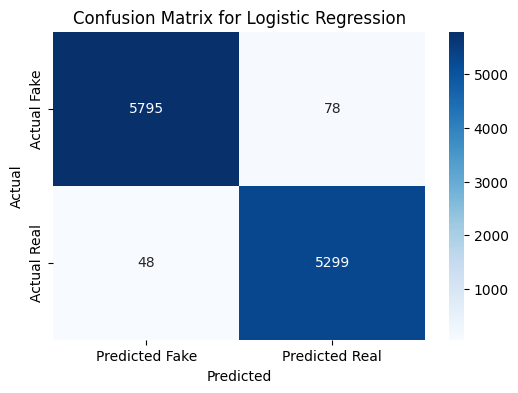

In [35]:
plot_confusion_matrix(y_test, pred_lr, 'Logistic Regression')

In [37]:
with open("logistic_model.pkl", "wb") as model_file:
    pickle.dump(LR, model_file)

In [ ]:
#desicion tree classifier


In [36]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train) 

DecisionTreeClassifier()

In [37]:
pred_dt = DT.predict(xv_test)

In [38]:
DT.score(xv_test,y_test)

0.9963458110516934

In [39]:
print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5873
           1       1.00      1.00      1.00      5347

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



In [40]:
with open("Decision_tree_model.pkl", "wb") as model_file:
    pickle.dump(DT, model_file)

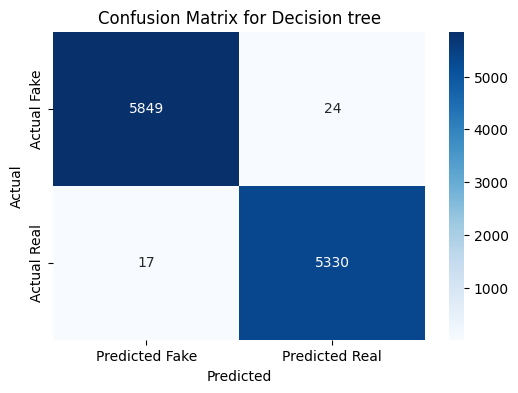

In [41]:
plot_confusion_matrix(y_test, pred_dt, 'Decision tree')

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier(random_state = 0)
GB.fit(xv_train, y_train) 

GradientBoostingClassifier(random_state=0)

In [43]:
pred_gb = GB.predict(xv_test)

In [44]:
GB.score(xv_test,y_test)

0.9941176470588236

In [45]:
print(classification_report(y_test,pred_gb))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5873
           1       0.99      1.00      0.99      5347

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



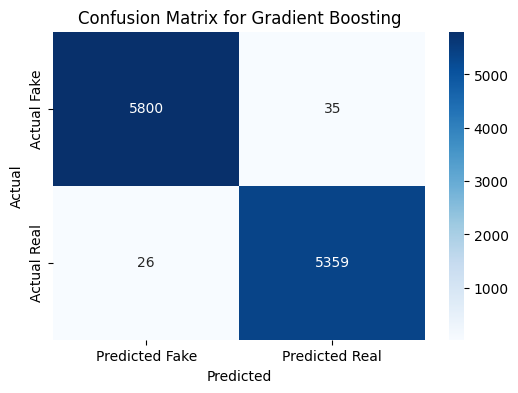

In [49]:
plot_confusion_matrix(y_test, pred_gb, 'Gradient Boosting')

In [50]:
with open("GradientBooster_model.pkl", "wb") as model_file:
    pickle.dump(GB, model_file)

In [ ]:
#random forrest classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state = 0)
RF.fit(xv_train, y_train) 

RandomForestClassifier(random_state=0)

In [47]:
pred_rf = RF.predict(xv_test)

In [48]:
RF.score(xv_test,y_test)

0.9888591800356507

In [49]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5873
           1       0.99      0.99      0.99      5347

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



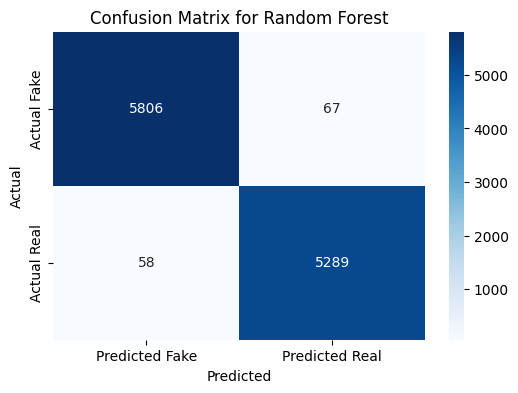

In [50]:
plot_confusion_matrix(y_test, pred_rf, 'Random Forest')

In [51]:
with open("RandomForest_model.pkl", "wb") as model_file:
    pickle.dump(RF, model_file)

In [52]:
def output_lable(n):
    if n==0:
        return "Fake News"
    elif n==1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test['text'] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GB = GB.predict(new_xv_test)
    pred_RF = RF.predict(new_xv_test)
    
    return print("\n\nLR Predicition: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction:{}".format(output_lable(pred_LR[0]),
                                                                                                             output_lable(pred_DT[0]),
                                                                                                             output_lable(pred_GB[0]),
                                                                                                             output_lable(pred_RF[0])))

In [57]:
metrics_LR = calculate_metrics(y_test, pred_lr, 'LR')
metrics_DT = calculate_metrics(y_test, pred_dt, 'DT')
metrics_RF = calculate_metrics(y_test, pred_rf, 'RF')
metrics_GB = calculate_metrics(y_test, pred_gb, 'GB')
all_matrics = [metrics_LR, metrics_DT, metrics_RF, metrics_GB]
com_df = pd.DataFrame(all_matrics)
print("Model comparison")
print(com_df)

Model comparison
  Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0    LR  0.988770   0.985494  0.991023  0.988251  0.988871
1    DT  0.996346   0.995517  0.996821  0.996169  0.996367
2    RF  0.988859   0.987491  0.989153  0.988321  0.988872
3    GB  0.994118   0.990891  0.996821  0.993847  0.994239


In [58]:
news = str(input("Enter the news : "))
manual_testing(news)

Enter the news :  hii




LR Predicition: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction:Fake News
